In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

import numpy as np

In [206]:
figure(figsize=(8, 6), dpi=80)
plt.rc('font', size=12) 

<Figure size 640x480 with 0 Axes>

In [214]:
performance_measure = 'ROCAUC'

df = pd.read_csv('./metrics/%s evaluation metrics.csv'%(performance_measure))

In [215]:
replaced_dataset = []
for x in list(df['Dataset']):
    if '_' in x:
        x = x.replace('_', ' ')
    replaced_dataset.append(x)
df['Dataset'] = replaced_dataset

In [216]:
real_dataset = ['bpic15', 'bpic17']
real_df = df[df['Dataset'].isin(real_dataset)]

synthetic_dataset = ['synthetic log b','synthetic log bc1', 'synthetic log bc2', 'synthetic log bc1c2']
synthetic_df = df[df['Dataset'].isin(synthetic_dataset)]

In [217]:
df_200 = df[df['Window size']==200]
df_200 = df_200.sort_values(by=['Dataset', 'Classifier']).reset_index(drop=True)

real_df_200 = real_df[real_df['Window size']==200]
real_df_200 = real_df_200.sort_values(by=['Dataset', 'Classifier']).reset_index(drop=True)

synthetic_df_200 = synthetic_df[synthetic_df['Window size']==200]
synthetic_df_200 = synthetic_df_200.sort_values(by=['Dataset', 'Classifier']).reset_index(drop=True)

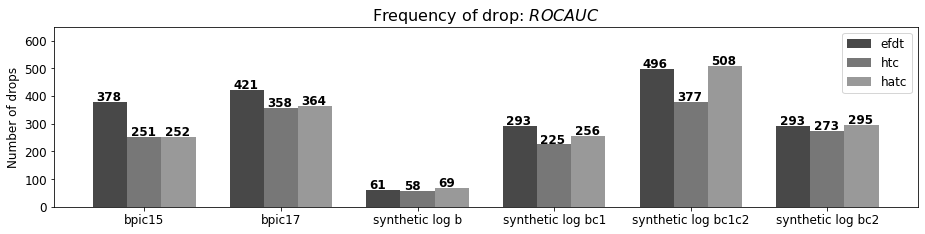

In [218]:
results =[]
x_label = []
cls_list = []

measurements = 'Frequency of drop'
classifiers = ['efdt','htc','hatc']
for classifier in classifiers:
    cls = df_200[df_200['Classifier'] == classifier]
    cls = cls.sort_values(by='Dataset')
    
    cls_list.append(classifier)
    x_label = list(cls['Dataset'])
    results.append(list(cls['Frequency of drop']))

X = np.arange(6)
fig = plt.figure(figsize = (12,2.5))

ax = fig.add_axes([0,0,1,1])

for pos, t in enumerate(x_label):
    if 'synthetic' in t:
        t = t.replace('_','\n')
#         t = t.split()

        x_label[pos] =t
ax.bar(X+0.0, results[0], color ='#484848', width=0.25, label = cls_list[0])
ax.bar(X+0.25, results[1], color ='#777', width=0.25, label = cls_list[1])
ax.bar(X+0.5, results[2], color ='#999', width=0.25, label = cls_list[2])

coordinates = []

for i in range(len(results)):
    for pos, t in enumerate(results[i]):
        if i==0:
            coordinates.append((X[pos], t))
        elif i==1:
            coordinates.append((X[pos]+0.25, t))
        elif i==2:
            coordinates.append((X[pos]+0.5, t))


for i, v in coordinates:
    ax.text(i-0.1, v + 5, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.25)
ax.set_xticklabels(x_label)
plt.ylim(0,650)

ax.set_title('Frequency of drop', fontsize=16)
ax.set_ylabel('Number of drops')
filename = performance_measure +'_'+ measurements.replace(' ', '_')
plt.legend()

plt.title('%s: ${%s}$'%(measurements,performance_measure), fontsize=16)
fig.savefig('./img/%s.pdf'%(filename),bbox_inches='tight')
plt.show()

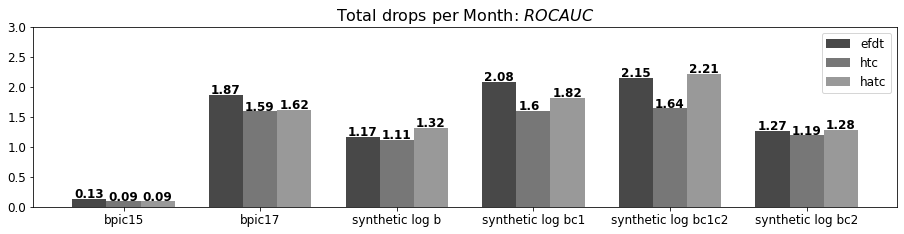

In [219]:
results =[]
x_label = []
cls_list = []
measurements = 'Total drops per Month'
classifiers = ['efdt','htc','hatc']
for classifier in classifiers:
    cls = df_200[df_200['Classifier'] == classifier]
    cls = cls.sort_values(by='Dataset')
    
    cls_list.append(classifier)
    x_label = list(cls['Dataset'])
    results.append(list(cls[measurements]))

X = np.arange(6)
fig = plt.figure(figsize = (12,2.5))

ax = fig.add_axes([0,0,1,1])

for pos, t in enumerate(x_label):
    if 'synthetic' in t:
        t = t.replace('_','\n')
#         t = t.split()
        x_label[pos] =t
ax.bar(X+0.0, results[0], color ='#484848', width=0.25, label = cls_list[0])
ax.bar(X+0.25, results[1], color ='#777', width=0.25, label = cls_list[1])
ax.bar(X+0.5, results[2], color ='#999', width=0.25, label = cls_list[2])

coordinates = []

for i in range(len(results)):
    for pos, t in enumerate(results[i]):
        if i==0:
            coordinates.append((X[pos], t))
        elif i==1:
            coordinates.append((X[pos]+0.25, t))
        elif i==2:
            coordinates.append((X[pos]+0.5, t))

for i, v in coordinates:
    ax.text(i-0.11, v + 0.02, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.25)
ax.set_xticklabels(x_label)
plt.ylim(0,3)

filename = performance_measure +'_'+ measurements.replace(' ', '_')
plt.legend()

plt.title('%s: ${%s}$'%(measurements,performance_measure), fontsize=16)
fig.savefig('./img/%s.pdf'%(filename),bbox_inches='tight')

plt.show()

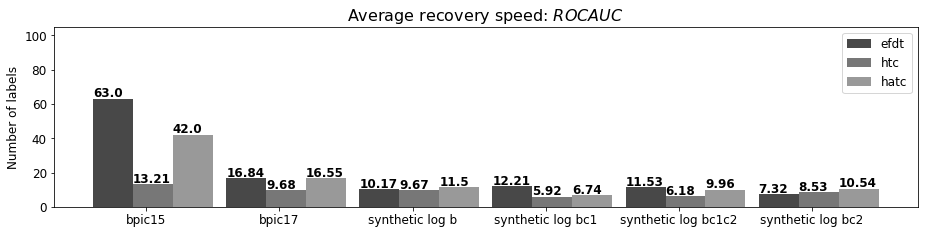

In [220]:
results =[]
x_label = []
cls_list = []
measurements = 'Average recovery speed'
classifiers = ['efdt','htc','hatc']
for classifier in classifiers:
    cls = df_200[df_200['Classifier'] == classifier]
    cls = cls.sort_values(by='Dataset')
    
    cls_list.append(classifier)
    x_label = list(cls['Dataset'])
    results.append(list(cls[measurements]))

X = np.arange(6)
fig = plt.figure(figsize = (12,2.5))

ax = fig.add_axes([0,0,1,1])

for pos, t in enumerate(x_label):
    if 'synthetic' in t:
        t = t.replace('_','\n')
#         t = t.split()
        x_label[pos] =t
ax.bar(X+0.0, results[0], color ='#484848', width=0.3, label = cls_list[0])
ax.bar(X+0.3, results[1], color ='#777', width=0.3, label = cls_list[1])
ax.bar(X+0.6, results[2], color ='#999', width=0.3, label = cls_list[2])

coordinates = []

for i in range(len(results)):
    for pos, t in enumerate(results[i]):
        if i==0:
            coordinates.append((X[pos], t))
        elif i==1:
            coordinates.append((X[pos]+0.3, t))
        elif i==2:
            coordinates.append((X[pos]+0.6, t))

for i, v in coordinates:
    ax.text(i-0.15, v + 1, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.25)
ax.set_xticklabels(x_label)
plt.ylim(0,105)

filename = performance_measure +'_'+ measurements.replace(' ', '_')
ax.set_ylabel('Number of labels')

plt.legend()

plt.title('%s: ${%s}$'%(measurements,performance_measure), fontsize=16)
fig.savefig('./img/%s.pdf'%(filename),bbox_inches='tight')

plt.show()

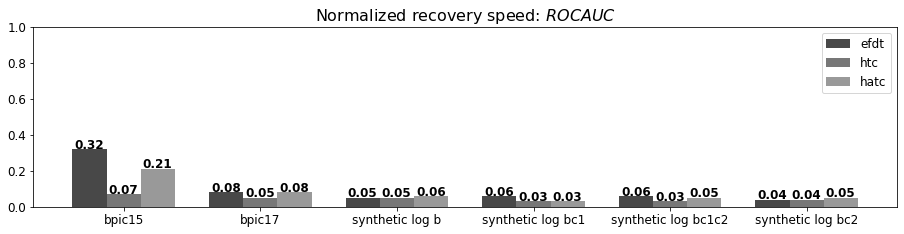

In [221]:
results =[]
x_label = []
cls_list = []
measurements = 'Normalized recovery speed'
classifiers = ['efdt','htc','hatc']
for classifier in classifiers:
    cls = df_200[df_200['Classifier'] == classifier]
    cls = cls.sort_values(by='Dataset')
    
    cls_list.append(classifier)
    x_label = list(cls['Dataset'])
    results.append(list(cls[measurements]))

X = np.arange(6)
fig = plt.figure(figsize = (12,2.5))

ax = fig.add_axes([0,0,1,1])

for pos, t in enumerate(x_label):
    if 'synthetic' in t:
        t = t.replace('_','\n')
#         t = t.split()
        x_label[pos] =t
ax.bar(X+0.0, results[0], color ='#484848', width=0.25, label = cls_list[0])
ax.bar(X+0.25, results[1], color ='#777', width=0.25, label = cls_list[1])
ax.bar(X+0.5, results[2], color ='#999', width=0.25, label = cls_list[2])

coordinates = []

for i in range(len(results)):
    for pos, t in enumerate(results[i]):
        if i==0:
            coordinates.append((X[pos], t))
        elif i==1:
            coordinates.append((X[pos]+0.25, t))
        elif i==2:
            coordinates.append((X[pos]+0.5, t))

for i, v in coordinates:
    ax.text(i-0.11, v + 0.005, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.25)
ax.set_xticklabels(x_label)
plt.ylim(0,1)

filename = performance_measure +'_'+ measurements.replace(' ', '_')
plt.legend()

plt.title('%s: ${%s}$'%(measurements,performance_measure), fontsize=16)
fig.savefig('./img/%s.pdf'%(filename),bbox_inches='tight')
plt.show()

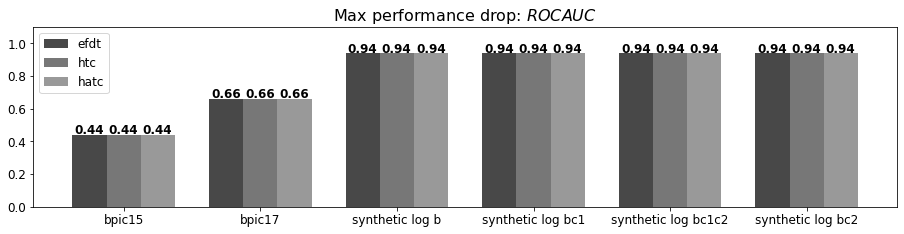

In [222]:
results =[]
x_label = []
cls_list = []
measurements = 'Max performance drop'
classifiers = ['efdt','htc','hatc']
for classifier in classifiers:
    cls = df_200[df_200['Classifier'] == classifier]
    cls = cls.sort_values(by='Dataset')
    
    cls_list.append(classifier)
    x_label = list(cls['Dataset'])
    results.append(list(cls[measurements]))

X = np.arange(6)
fig = plt.figure(figsize = (12,2.5))

ax = fig.add_axes([0,0,1,1])

for pos, t in enumerate(x_label):
    if 'synthetic' in t:
        t = t.replace('_','\n')
#         t = t.split()
        x_label[pos] =t
ax.bar(X+0.0, results[0], color ='#484848', width=0.25, label = cls_list[0])
ax.bar(X+0.25, results[1], color ='#777', width=0.25, label = cls_list[1])
ax.bar(X+0.5, results[2], color ='#999', width=0.25, label = cls_list[2])

coordinates = []

for i in range(len(results)):
    for pos, t in enumerate(results[i]):
        if i==0:
            coordinates.append((X[pos], t))
        elif i==1:
            coordinates.append((X[pos]+0.25, t))
        elif i==2:
            coordinates.append((X[pos]+0.5, t))

for i, v in coordinates:
    ax.text(i-0.11, v + 0.005, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.25)
ax.set_xticklabels(x_label)
plt.ylim(0,1.1)


filename = performance_measure +'_'+ measurements.replace(' ', '_')
plt.legend()

plt.title('%s: ${%s}$'%(measurements,performance_measure), fontsize=16)
fig.savefig('./img/%s.pdf'%(filename),bbox_inches='tight')
plt.show()

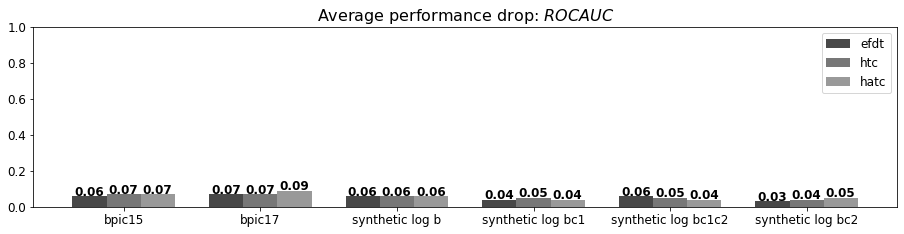

In [223]:
results =[]
x_label = []
cls_list = []
measurements = 'Average performance drop'
classifiers = ['efdt','htc','hatc']
for classifier in classifiers:
    cls = df_200[df_200['Classifier'] == classifier]
    cls = cls.sort_values(by='Dataset')
    
    cls_list.append(classifier)
    x_label = list(cls['Dataset'])
    results.append(list(cls[measurements]))

X = np.arange(6)
fig = plt.figure(figsize = (12,2.5))

ax = fig.add_axes([0,0,1,1])

for pos, t in enumerate(x_label):
    if 'synthetic' in t:
        t = t.replace('_','\n')
#         t = t.split()
        x_label[pos] =t
ax.bar(X+0.0, results[0], color ='#484848', width=0.25, label = cls_list[0])
ax.bar(X+0.25, results[1], color ='#777', width=0.25, label = cls_list[1])
ax.bar(X+0.5, results[2], color ='#999', width=0.25, label = cls_list[2])

coordinates = []

for i in range(len(results)):
    for pos, t in enumerate(results[i]):
        if i==0:
            coordinates.append((X[pos], t))
        elif i==1:
            coordinates.append((X[pos]+0.25, t))
        elif i==2:
            coordinates.append((X[pos]+0.5, t))

for i, v in coordinates:
    ax.text(i-0.11, v + 0.005, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.25)
ax.set_xticklabels(x_label)
plt.ylim(0,1)


filename = performance_measure +'_'+ measurements.replace(' ', '_')
plt.legend()

plt.title('%s: ${%s}$'%(measurements,performance_measure), fontsize=16)
fig.savefig('./img/%s.pdf'%(filename),bbox_inches='tight')
plt.show()

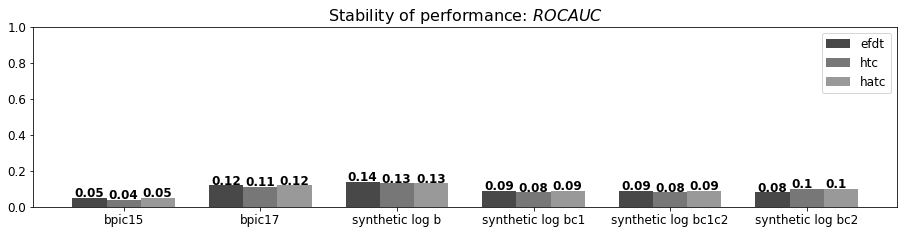

In [224]:
results =[]
x_label = []
cls_list = []
measurements = 'Stability of performance'
classifiers = ['efdt','htc','hatc']
for classifier in classifiers:
    cls = df_200[df_200['Classifier'] == classifier]
    cls = cls.sort_values(by='Dataset')
    
    cls_list.append(classifier)
    x_label = list(cls['Dataset'])
    results.append(list(cls[measurements]))

X = np.arange(6)
fig = plt.figure(figsize = (12,2.5))

ax = fig.add_axes([0,0,1,1])

for pos, t in enumerate(x_label):
    if 'synthetic' in t:
        t = t.replace('_','\n')
#         t = t.split()
        x_label[pos] =t
ax.bar(X+0.0, results[0], color ='#484848', width=0.25, label = cls_list[0])
ax.bar(X+0.25, results[1], color ='#777', width=0.25, label = cls_list[1])
ax.bar(X+0.5, results[2], color ='#999', width=0.25, label = cls_list[2])

coordinates = []

for i in range(len(results)):
    for pos, t in enumerate(results[i]):
        if i==0:
            coordinates.append((X[pos], t))
        elif i==1:
            coordinates.append((X[pos]+0.25, t))
        elif i==2:
            coordinates.append((X[pos]+0.5, t))

for i, v in coordinates:
    ax.text(i-0.11, v + 0.005, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.25)
ax.set_xticklabels(x_label)
plt.ylim(0,1)


filename = performance_measure +'_'+ measurements.replace(' ', '_')
plt.legend()

plt.title('%s: ${%s}$'%(measurements,performance_measure), fontsize=16)
fig.savefig('./img/%s.pdf'%(filename),bbox_inches='tight')

plt.show()

454
389
447


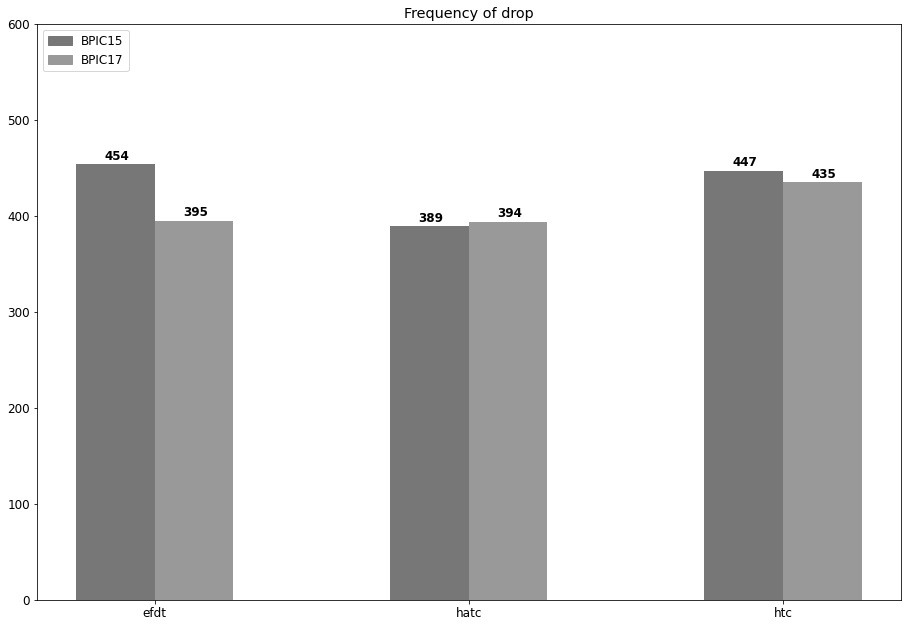

In [96]:
X = np.arange(3)
fig = plt.figure(figsize = (12,8))
x_label = []
results = []
ax = fig.add_axes([0,0,1,1])


for pos, d in enumerate(list(real_df_200['Dataset'])):
    if d == 'bpic15':
        print(real_df_200.loc[pos, 'Frequency of drop'])
        x_coordinates = X[pos]
        ax.bar(X[pos], real_df_200.loc[pos, 'Frequency of drop'], color = '#777', width=0.25, label = 'bpic15')
    
    elif d == 'bpic17':
        x_coordinates = X[pos-3]+0.25
        ax.bar(X[pos-3]+0.25, real_df_200.loc[pos, 'Frequency of drop'], color = '#999', width=0.25, label = 'bpic17')
    
    classifier = list(real_df_200['Classifier'])[pos]
    if classifier not in x_label:
        x_label.append(classifier)
    results.append([x_coordinates, real_df_200.loc[pos, 'Frequency of drop']])
    
for i, v in results:
    ax.text(i-0.035, v + 5, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.125)
ax.set_xticklabels(x_label)
ax.set_ylim(0,600)

bpic15_patch = mpatches.Patch(color='#777', label='BPIC15')
bpic17_patch = mpatches.Patch(color='#999', label='BPIC17')
ax.legend(handles=[bpic15_patch, bpic17_patch], loc='upper left')

plt.title('Frequency of drop')

plt.show()

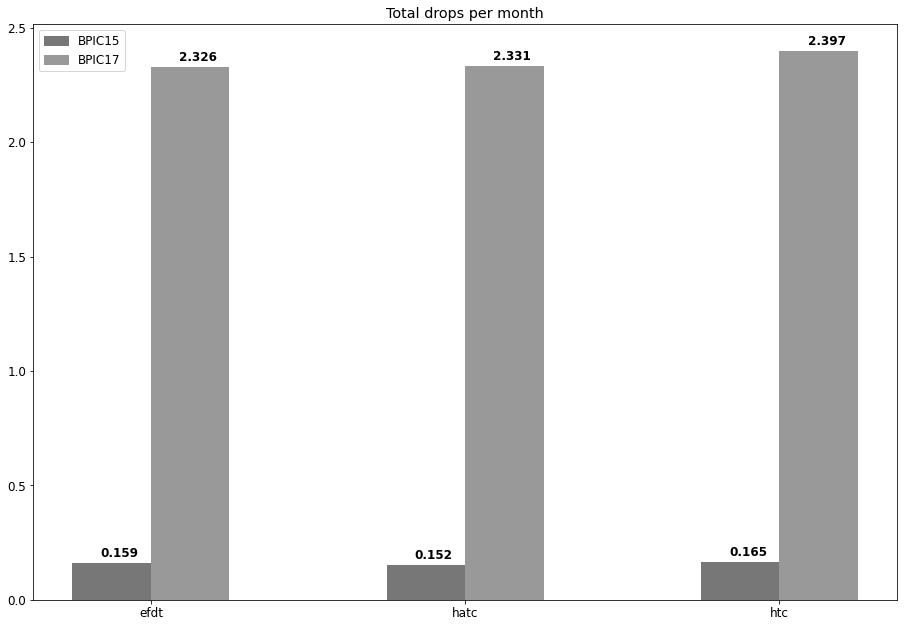

In [120]:
X = np.arange(3)
fig = plt.figure(figsize = (12,8))
x_label = []
results = []
ax = fig.add_axes([0,0,1,1])


# plt.clf()
for pos, d in enumerate(list(real_df_200['Dataset'])):
    if d == 'bpic15':
        
        x_coordinates = X[pos]
        ax.bar(X[pos], real_df_200.loc[pos, 'Total drops per Month'], color = '#777', width=0.25, label = 'bpic15')
    
    elif d == 'bpic17':
        x_coordinates = X[pos-3]+0.25
        ax.bar(X[pos-3]+0.25, real_df_200.loc[pos, 'Total drops per Month'], color = '#999', width=0.25, label = 'bpic17')
    
    classifier = list(real_df_200['Classifier'])[pos]
    if classifier not in x_label:
        x_label.append(classifier)
    results.append([x_coordinates, real_df_200.loc[pos, 'Total drops per Month']])

for i, v in results:
    ax.text(i-0.035, v + 0.03, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.125)
ax.set_xticklabels(x_label)

bpic15_patch = mpatches.Patch(color='#777', label='BPIC15')
bpic17_patch = mpatches.Patch(color='#999', label='BPIC17')
ax.legend(handles=[bpic15_patch, bpic17_patch])

plt.title('Total drops per month')

plt.show()

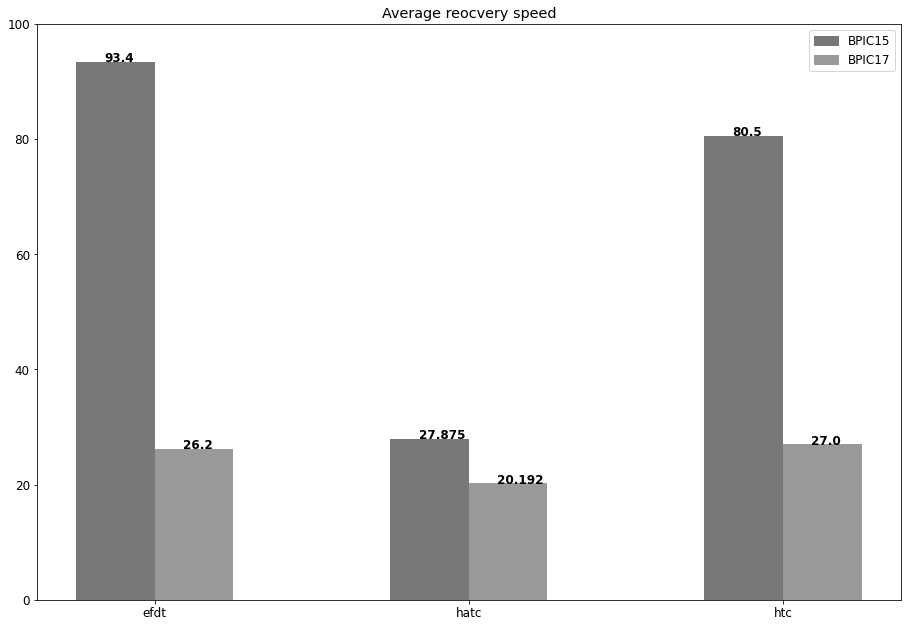

In [121]:
X = np.arange(3)
fig = plt.figure(figsize = (12,8))
x_label = []
results = []
ax = fig.add_axes([0,0,1,1])


# plt.clf()
for pos, d in enumerate(list(real_df_200['Dataset'])):
    if d == 'bpic15':
        
        x_coordinates = X[pos]
        ax.bar(X[pos], real_df_200.loc[pos, 'Average recovery speed'], color = '#777', width=0.25, label = 'bpic15')
    
    elif d == 'bpic17':
        x_coordinates = X[pos-3]+0.25
        ax.bar(X[pos-3]+0.25, real_df_200.loc[pos, 'Average recovery speed'], color = '#999', width=0.25, label = 'bpic17')
    
    classifier = list(real_df_200['Classifier'])[pos]
    if classifier not in x_label:
        x_label.append(classifier)
    results.append([x_coordinates, real_df_200.loc[pos, 'Average recovery speed']])

for i, v in results:
    ax.text(i-0.035, v + 0.03, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.125)
ax.set_xticklabels(x_label)
ax.set_ylim(0,100)

bpic15_patch = mpatches.Patch(color='#777', label='BPIC15')
bpic17_patch = mpatches.Patch(color='#999', label='BPIC17')
ax.legend(handles=[bpic15_patch, bpic17_patch])

plt.title('Average reocvery speed')

plt.show()

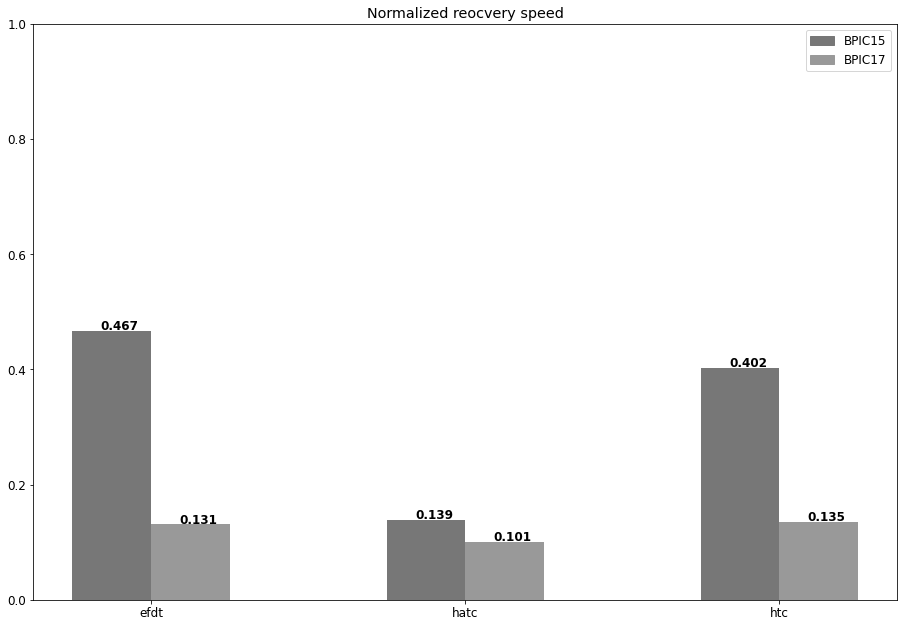

In [122]:
X = np.arange(3)
fig = plt.figure(figsize = (12,8))
x_label = []
results = []
ax = fig.add_axes([0,0,1,1])


# plt.clf()
for pos, d in enumerate(list(real_df_200['Dataset'])):
    if d == 'bpic15':
        
        x_coordinates = X[pos]
        ax.bar(X[pos], real_df_200.loc[pos, 'Normalized recovery speed'], color = '#777', width=0.25, label = 'bpic15')
    
    elif d == 'bpic17':
        x_coordinates = X[pos-3]+0.25
        ax.bar(X[pos-3]+0.25, real_df_200.loc[pos, 'Normalized recovery speed'], color = '#999', width=0.25, label = 'bpic17')
    
    classifier = list(real_df_200['Classifier'])[pos]
    if classifier not in x_label:
        x_label.append(classifier)
    results.append([x_coordinates, real_df_200.loc[pos, 'Normalized recovery speed']])

for i, v in results:
    ax.text(i-0.035, v + 0.002, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.125)
ax.set_xticklabels(x_label)
ax.set_ylim(0,1)


bpic15_patch = mpatches.Patch(color='#777', label='BPIC15')
bpic17_patch = mpatches.Patch(color='#999', label='BPIC17')
ax.legend(handles=[bpic15_patch, bpic17_patch])

plt.title('Normalized reocvery speed')

plt.show()

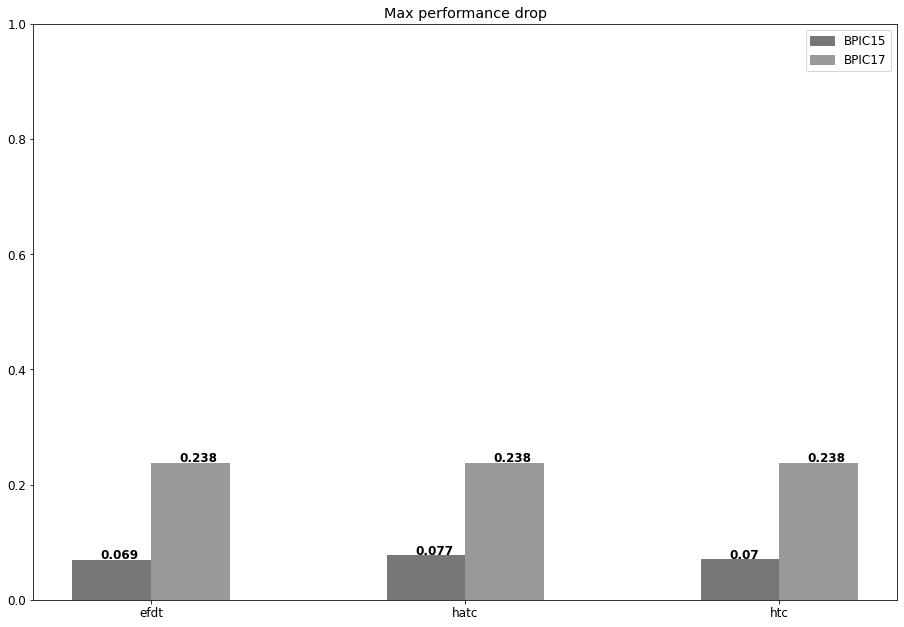

In [123]:
X = np.arange(3)
fig = plt.figure(figsize = (12,8))
x_label = []
results = []
ax = fig.add_axes([0,0,1,1])


# plt.clf()
for pos, d in enumerate(list(real_df_200['Dataset'])):
    if d == 'bpic15':
        
        x_coordinates = X[pos]
        ax.bar(X[pos], real_df_200.loc[pos, 'Max performance drop'], color = '#777', width=0.25, label = 'bpic15')
    
    elif d == 'bpic17':
        x_coordinates = X[pos-3]+0.25
        ax.bar(X[pos-3]+0.25, real_df_200.loc[pos, 'Max performance drop'], color = '#999', width=0.25, label = 'bpic17')
    
    classifier = list(real_df_200['Classifier'])[pos]
    if classifier not in x_label:
        x_label.append(classifier)
    results.append([x_coordinates, real_df_200.loc[pos, 'Max performance drop']])

for i, v in results:
    ax.text(i-0.035, v + 0.002, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.125)
ax.set_xticklabels(x_label)
ax.set_ylim(0,1)

bpic15_patch = mpatches.Patch(color='#777', label='BPIC15')
bpic17_patch = mpatches.Patch(color='#999', label='BPIC17')
ax.legend(handles=[bpic15_patch, bpic17_patch])

plt.title('Max performance drop')

plt.show()

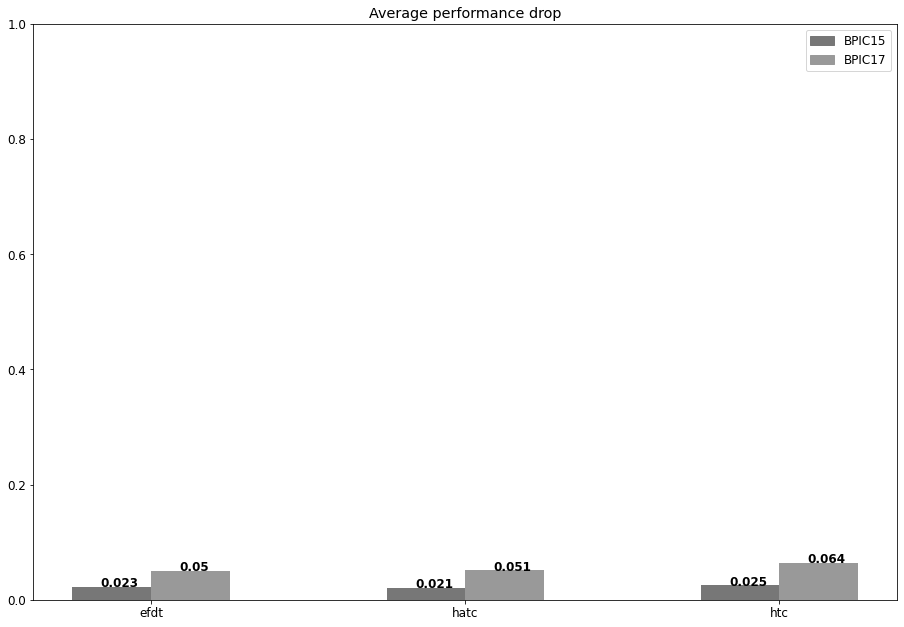

In [124]:
X = np.arange(3)
fig = plt.figure(figsize = (12,8))
x_label = []
results = []
ax = fig.add_axes([0,0,1,1])


# plt.clf()
for pos, d in enumerate(list(real_df_200['Dataset'])):
    if d == 'bpic15':
        
        x_coordinates = X[pos]
        ax.bar(X[pos], real_df_200.loc[pos, 'Average performance drop'], color = '#777', width=0.25, label = 'bpic15')
    
    elif d == 'bpic17':
        x_coordinates = X[pos-3]+0.25
        ax.bar(X[pos-3]+0.25, real_df_200.loc[pos, 'Average performance drop'], color = '#999', width=0.25, label = 'bpic17')
    
    classifier = list(real_df_200['Classifier'])[pos]
    if classifier not in x_label:
        x_label.append(classifier)
    results.append([x_coordinates, real_df_200.loc[pos, 'Average performance drop']])

for i, v in results:
    ax.text(i-0.035, v + 0.0005, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.125)
ax.set_xticklabels(x_label)
ax.set_ylim(0,1)

bpic15_patch = mpatches.Patch(color='#777', label='BPIC15')
bpic17_patch = mpatches.Patch(color='#999', label='BPIC17')
ax.legend(handles=[bpic15_patch, bpic17_patch])

plt.title('Average performance drop')

plt.show()

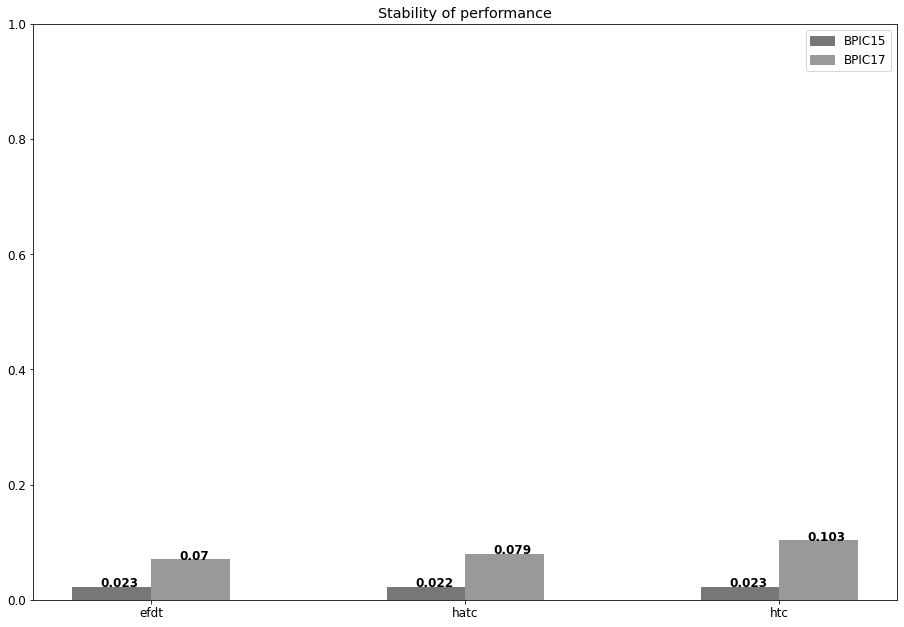

In [125]:
X = np.arange(3)
fig = plt.figure(figsize = (12,8))
x_label = []
results = []
ax = fig.add_axes([0,0,1,1])


# plt.clf()
for pos, d in enumerate(list(real_df_200['Dataset'])):
    if d == 'bpic15':
        
        x_coordinates = X[pos]
        ax.bar(X[pos], real_df_200.loc[pos, 'Stability of performance'], color = '#777', width=0.25, label = 'bpic15')
    
    elif d == 'bpic17':
        x_coordinates = X[pos-3]+0.25
        ax.bar(X[pos-3]+0.25, real_df_200.loc[pos, 'Stability of performance'], color = '#999', width=0.25, label = 'bpic17')
    
    classifier = list(real_df_200['Classifier'])[pos]
    if classifier not in x_label:
        x_label.append(classifier)
    results.append([x_coordinates, real_df_200.loc[pos, 'Stability of performance']])

for i, v in results:
    ax.text(i-0.035, v + 0.0005, str(v), color='black', fontweight='bold')
    
ax.set_xticks(X+0.125)
ax.set_xticklabels(x_label)
ax.set_ylim(0,1)

bpic15_patch = mpatches.Patch(color='#777', label='BPIC15')
bpic17_patch = mpatches.Patch(color='#999', label='BPIC17')
ax.legend(handles=[bpic15_patch, bpic17_patch])

plt.title('Stability of performance')

plt.show()